In [66]:
# Import libraries for data analysis and visualization

import numpy as np  # For numerical operations and linear algebra
import pandas as pd  # For data processing and handling CSV files
import matplotlib.pyplot as plt  # For creating static plots and graphs
import seaborn as sns  # For generating advanced, interactive plots
import plotly.offline as py  # For offline Plotly graphing capabilities
import plotly.graph_objs as go  # For creating Plotly graphs using graph objects
from pylab import rcParams  # For configuring plot size and style
import random
import warnings  # To handle warnings

In [8]:
py.init_notebook_mode(connected=True)  # Initializes Plotly for Jupyter notebooks
warnings.filterwarnings('ignore')  # Suppresses warnings from being displayed
# Use this line to enable inline plotting for Jupyter notebooks
%matplotlib inline

In [14]:
df = pd.read_csv("/kaggle/input/google-play-store-apps/googleplaystore.csv")

In [15]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [16]:
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Checking Missing Data

In [17]:
# Calculate the total number of missing values for each column, sorted in descending order
total_missing = data.isnull().sum().sort_values(ascending=False)

# Calculate the percentage of missing values for each column, sorted in descending order
percent_missing = (data.isnull().sum() / data.shape[0]).sort_values(ascending=False)

# Combine the total and percentage of missing values into a single DataFrame
missing_data_summary = pd.concat([total_missing, percent_missing], axis=1, keys=['Total Missing', 'Percent Missing'])

# Display the first few rows of the missing data summary
missing_data_summary.head()

,Total Missing,Percent Missing
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Type,1,0.000092
Content Rating,1,0.000092


#  Dropping Missing Values

In [20]:
df.dropna(how ='any', inplace = True)

In [21]:
# Calculate the total number of missing values for each column, sorted in descending order
total_missing = data.isnull().sum().sort_values(ascending=False)

# Calculate the percentage of missing values for each column, sorted in descending order
percent_missing = (data.isnull().sum() / data.shape[0]).sort_values(ascending=False)

# Combine the total and percentage of missing values into a single DataFrame
missing_data_summary = pd.concat([total_missing, percent_missing], axis=1, keys=['Total Missing', 'Percent Missing'])

# Display the first few rows of the missing data summary
missing_data_summary.head()

,Total Missing,Percent Missing
App,0,0.0
Category,0,0.0
Rating,0,0.0
Reviews,0,0.0
Size,0,0.0


In [23]:
df.shape

(9360, 13)

After removing missing data, our dataset now consists of 9,360 records and 13 fields.

# 1. Rating

In [24]:
df['Rating'].describe()

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Distribution of Ratings')

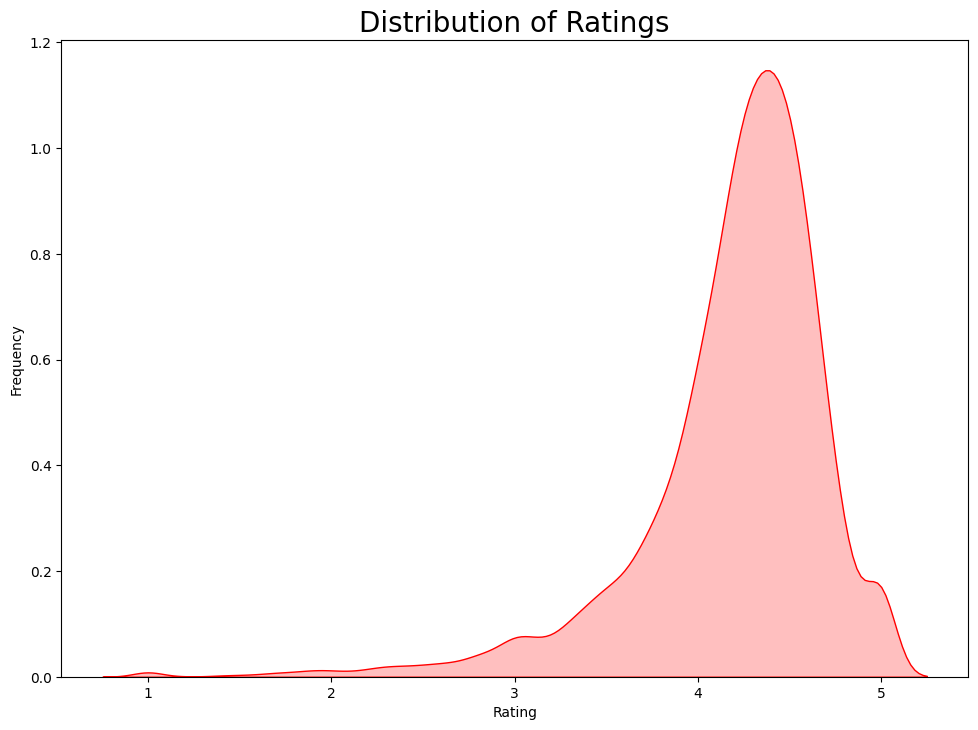

In [25]:
# Set the figure size for the plot
rcParams['figure.figsize'] = 11.7, 8.27

# Create a KDE plot for the 'Rating' column with shading and a red color
g = sns.kdeplot(df['Rating'], color="Red", shade=True)

# Label the x-axis and y-axis
g.set_xlabel("Rating")
g.set_ylabel("Frequency")

# Set the title of the plot with a font size of 20
plt.title('Distribution of Ratings', size=20)

The average rating of applications in the store is approximately 4, which is quite high.

# 2. Category

In [26]:
print(len(df['Category'].unique()), "categories")

print("\n", df['Category'].unique())

33 categories

 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


Text(0.5, 1.0, 'Number of Apps in Each Category')

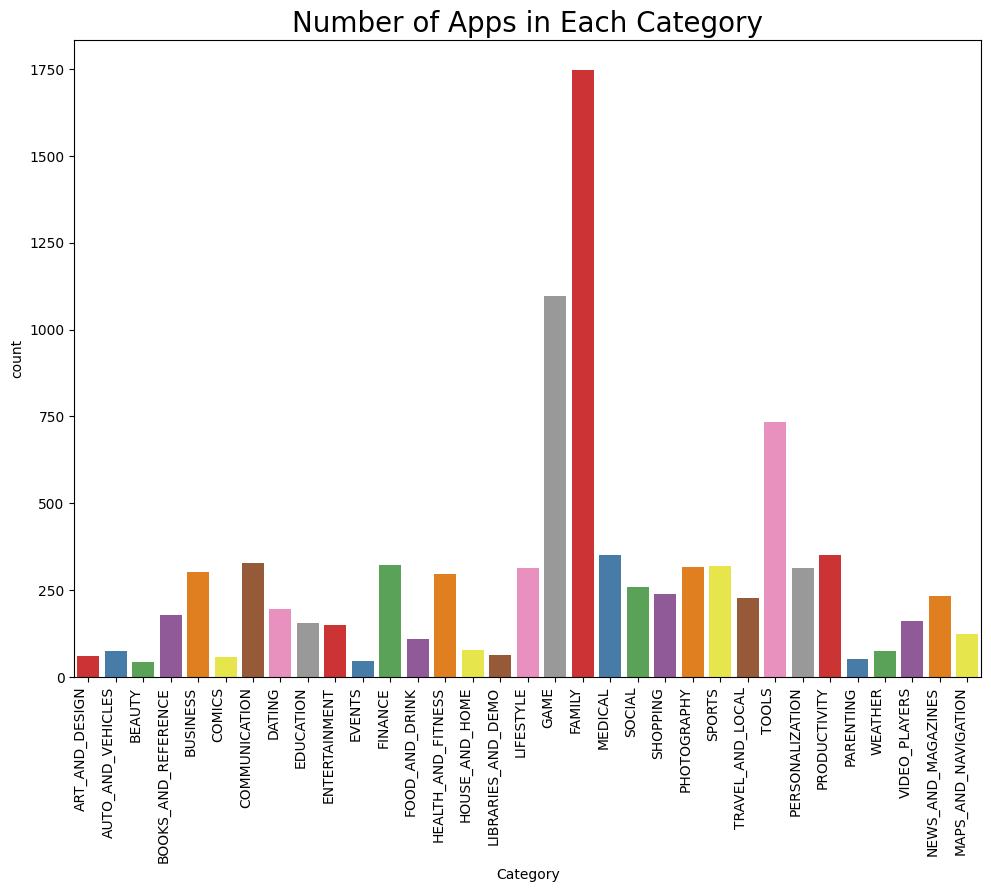

In [27]:
# Create a count plot for the 'Category' column with a color palette
g = sns.countplot(x="Category", data=df, palette="Set1")

# Rotate the x-axis labels to 90 degrees and align them to the right
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")

# Set the plot title with a font size of 20
plt.title('Number of Apps in Each Category', size=20)

The 'Game' and 'Family' categories are the most frequently represented among applications in the store.

Text(0.5, 1.0, 'Boxplot of Ratings by Category')

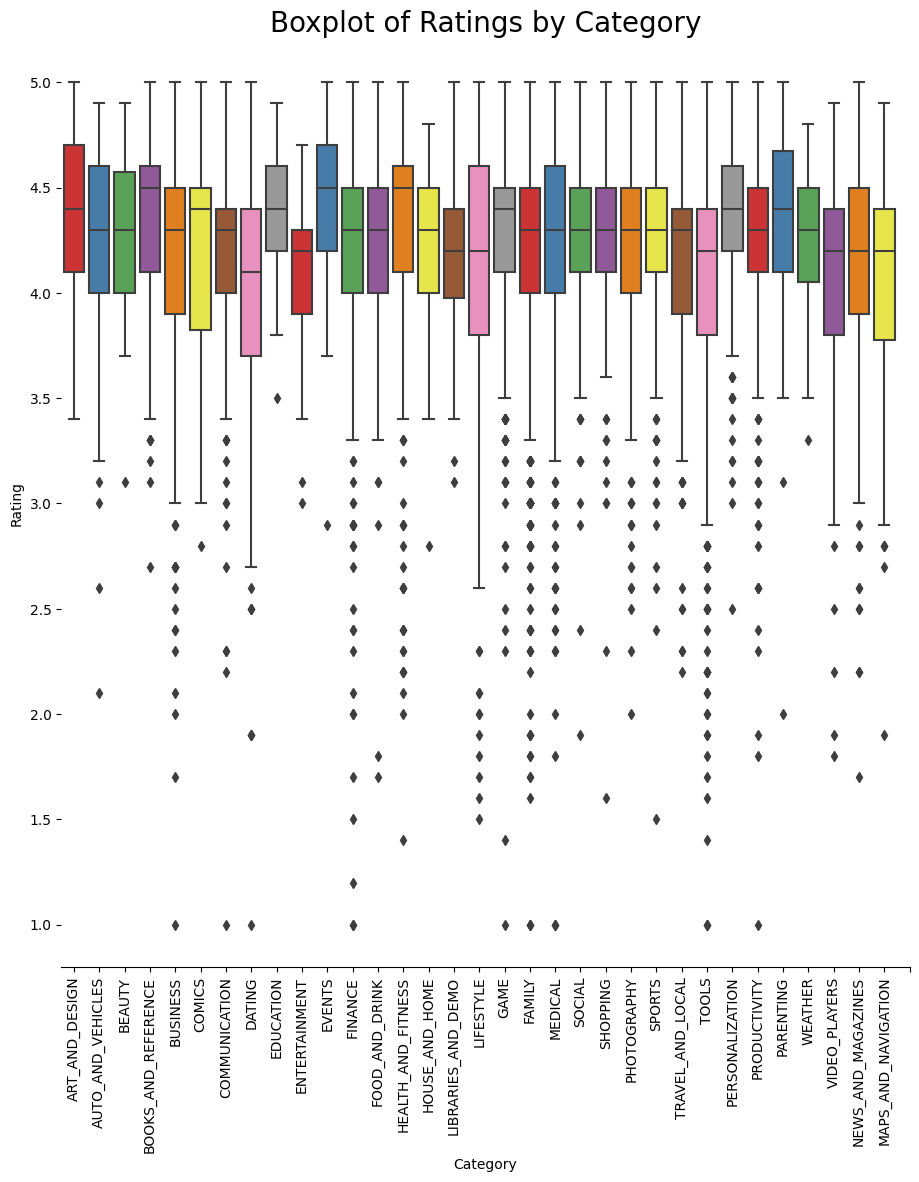

In [28]:
# Create a boxplot of 'Rating' across different 'Category' values using seaborn
g = sns.catplot(x="Category", y="Rating", data=df, kind="box", height=10, palette="Set1")

# Remove the left spine from the plot for better aesthetics
g.despine(left=True)

# Rotate the x-axis labels to 90 degrees for better readability
g.set_xticklabels(rotation=90)

# Set the x-axis ticks to a specific range
g.set(xticks=range(0, 34))

# Label the y-axis as 'Rating'
g = g.set_ylabels("Rating")

# Add a title to the plot with a font size of 20
plt.title('Boxplot of Ratings by Category', size=20)

Ratings of applications across different categories do not vary significantly.

# 3. Reviews

In [29]:
df['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

The data is still in object format; we need to convert it to integers.

In [30]:
# Convert the 'Reviews' column to integer type
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

Text(0.5, 1.0, 'Distribution of Reviews')

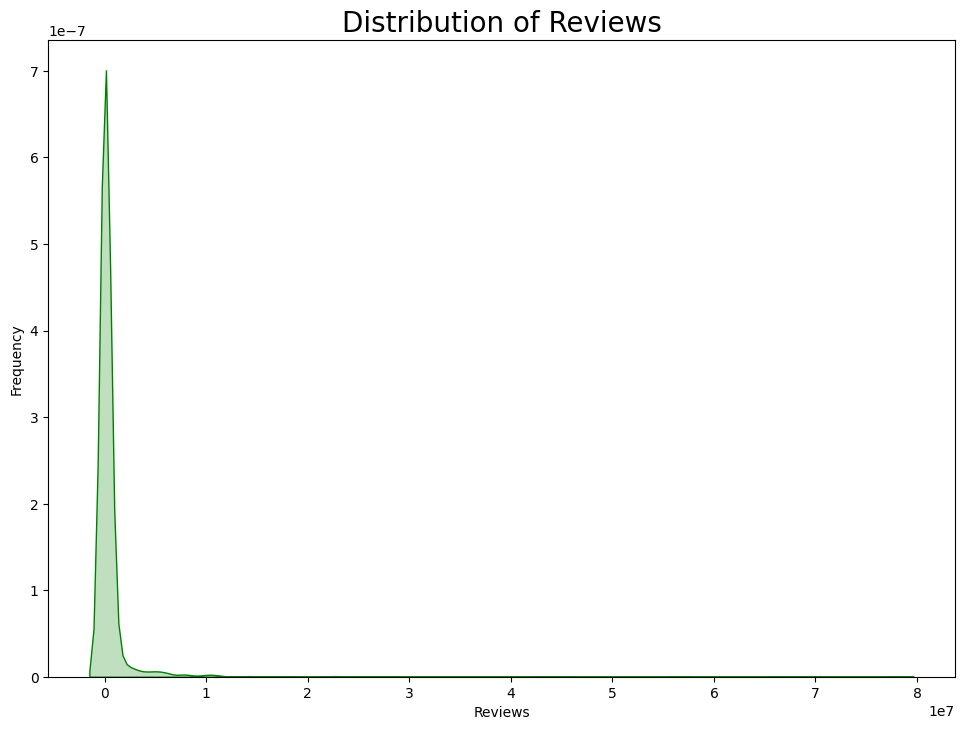

In [31]:
# Set the figure size for the plot
rcParams['figure.figsize'] = 11.7, 8.27

# Create a KDE plot for the 'Reviews' column with shading and green color
g = sns.kdeplot(df['Reviews'], color="Green", shade=True)

# Label the x-axis and y-axis
g.set_xlabel("Reviews")
g.set_ylabel("Frequency")

# Set the title of the plot with a font size of 20
plt.title('Distribution of Reviews', size=20)

In [32]:
# Display the first few rows of the DataFrame where the 'Reviews' column is greater than 5,000,000
df[df['Reviews'] > 5000000].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
351,Opera Mini - fast web browser,COMMUNICATION,4.5,5149854,Varies with device,"100,000,000+",Free,0,Everyone,Communication,"July 19, 2018",Varies with device,Varies with device


Most applications in the store have fewer than 1 million reviews. It is clear that well-known applications tend to have a significantly higher number of reviews.

<Figure size 1000x1000 with 0 Axes>

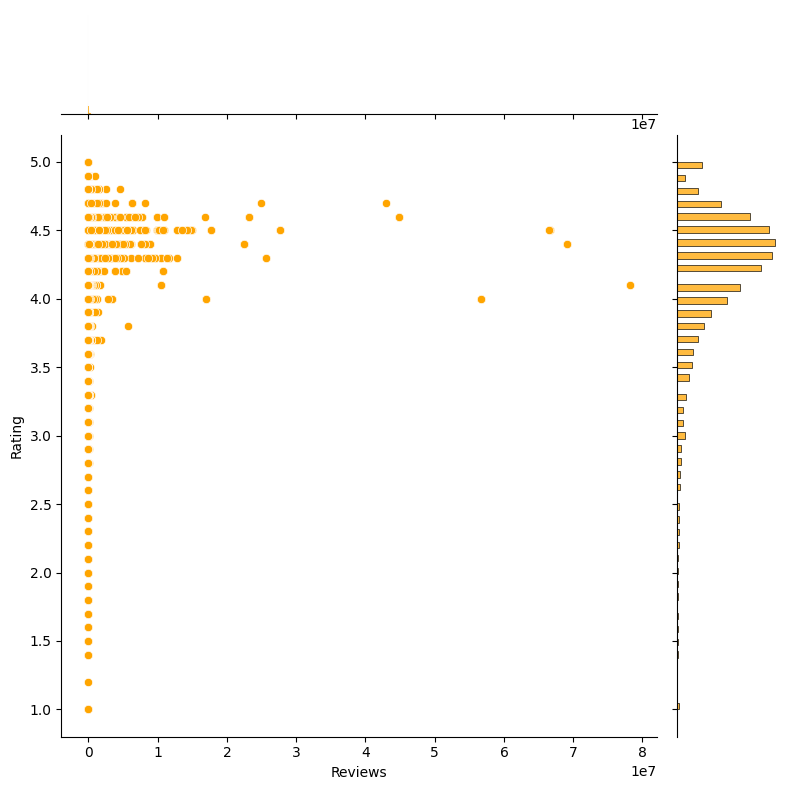

In [33]:
# Set the figure size for the plot
plt.figure(figsize=(10, 10))

# Create a joint plot to show the relationship between 'Reviews' and 'Rating'
g = sns.jointplot(x="Reviews", y="Rating", color='orange', data=df, height=8)

Text(0.5, 1.0, 'Rating vs Reviews')

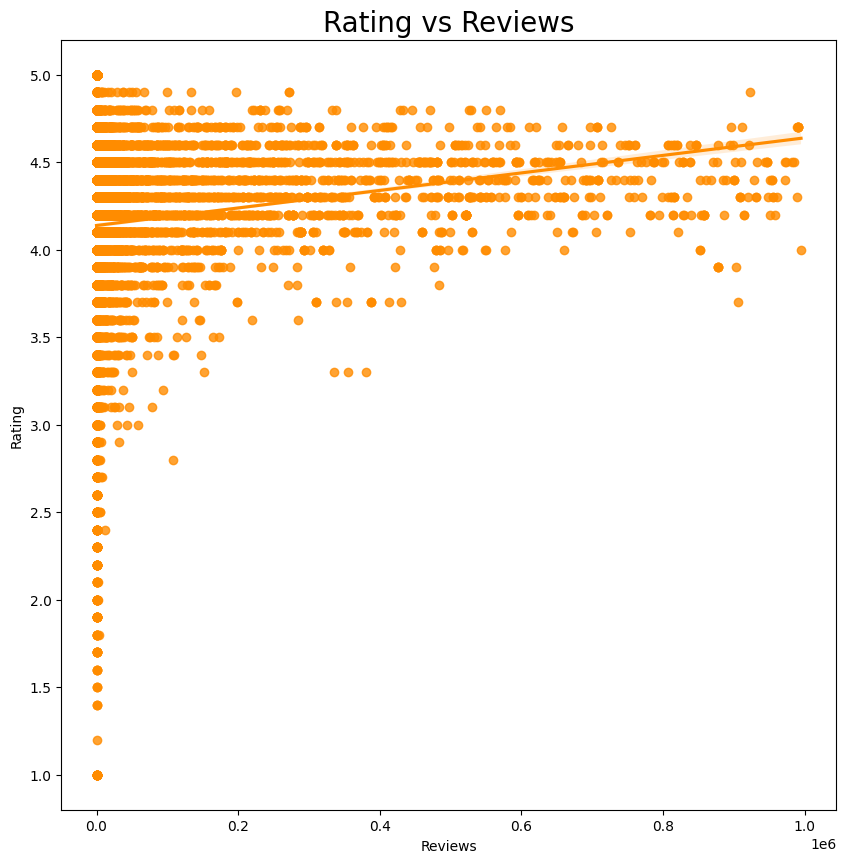

In [34]:
# Set the figure size for the plot
plt.figure(figsize=(10, 10))

# Create a regression plot to show the relationship between 'Reviews' and 'Rating'
# Only include data where 'Reviews' is less than 1,000,000
sns.regplot(x="Reviews", y="Rating", color='darkorange', data=df[df['Reviews'] < 1000000])

# Add a title to the plot with a font size of 20
plt.title('Rating vs Reviews', size=20)

It appears that well-known applications tend to receive higher ratings.

# 4. Size

In [35]:
df['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [36]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

The data is still in object format and contains metric symbols as prefixes, as well as special values like 'Varies with device' that need to be addressed.

In [37]:
# Count the number of entries where 'Size' is 'Varies with device'
len(df[df['Size'] == 'Varies with device'])

1637

In [38]:
# Replace 'Varies with device' in the 'Size' column with NaN
df['Size'].replace('Varies with device', np.nan, inplace=True)

In [39]:
# Convert the 'Size' column from object type to numeric type
df['Size'] = (
    # Remove suffixes like 'k' and 'M' from the 'Size' column and convert to float
    df['Size'].replace(r'[kM]+$', '', regex=True).astype(float) * 
    
    # Extract the suffix (e.g., 'k' or 'M'), replace with numeric multipliers, and convert to integers
    df['Size'].str.extract(r'[\d\.]+([KM]+)', expand=False)
    .fillna(1)  # Replace missing values with 1
    .replace(['k', 'M'], [10**3, 10**6])  # Replace suffixes with numeric multipliers
    .astype(int)  # Convert to integers
)

In [40]:
# Fill missing values in the 'Size' column with the mean size for each category
df['Size'].fillna(df.groupby('Category')['Size'].transform('mean'), inplace=True)

<Figure size 1000x1000 with 0 Axes>

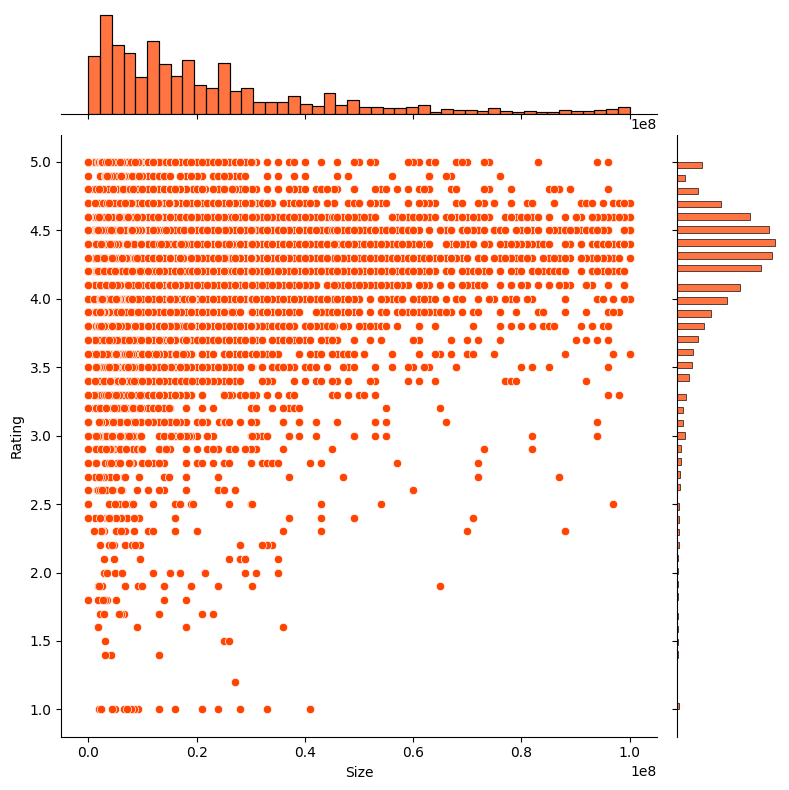

In [41]:
# Set the figure size for the plot
plt.figure(figsize=(10, 10))

# Create a joint plot to show the relationship between 'Size' and 'Rating'
g = sns.jointplot(x="Size", y="Rating", color='orangered', data=df, height=8)

# 5. Installs

In [42]:
df['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

The data is still in object format and contains plus signs that need to be addressed.

In [44]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

Encoding the sizes using an ordinal scheme:

0 represents '1+'
1 represents '5+'
2 represents '10+'

In [45]:
# Remove commas and plus signs from the 'Installs' column and convert to integers
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', ''))  # Remove commas
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', ''))  # Remove plus signs
df['Installs'] = df['Installs'].apply(lambda x: int(x))  # Convert to integer

In [46]:
df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1])

In [47]:
# Get a sorted list of unique values from the 'Installs' column
sorted_values = sorted(df['Installs'].unique())

In [50]:
# Replace the unique 'Installs' values with their corresponding integer codes based on their sorted order
df['Installs'].replace(sorted_values, range(len(sorted_values)), inplace=True)

In [51]:
df['Installs'].head()

0     8
1    11
2    13
3    15
4    10
Name: Installs, dtype: int64

Text(0.5, 1.0, 'Rating vs Installs')

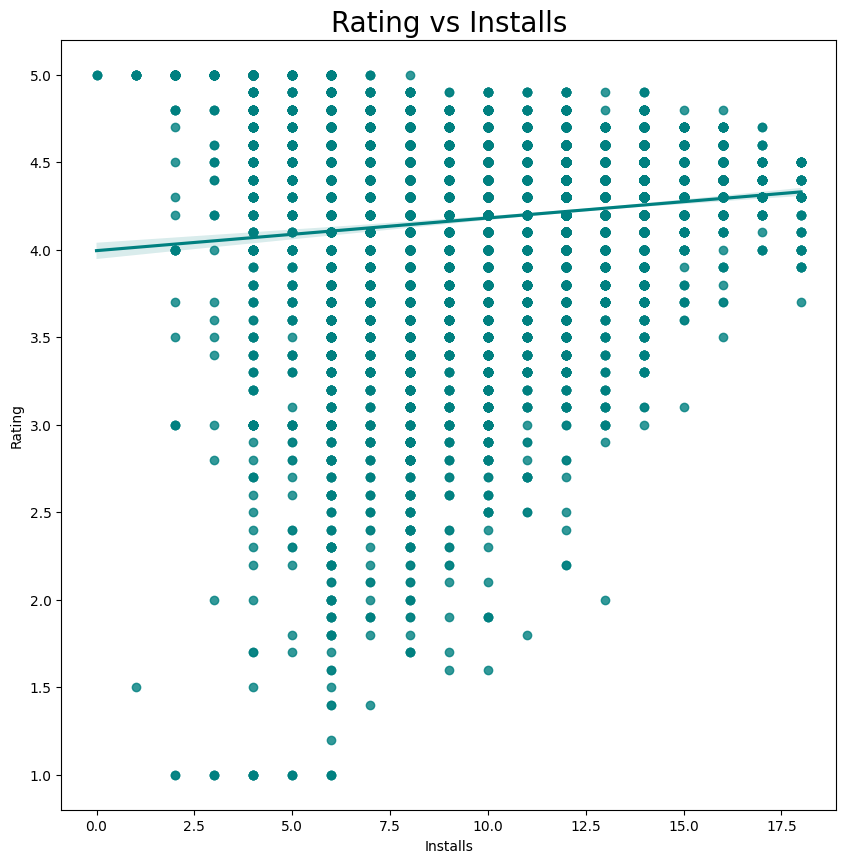

In [52]:
# Set the figure size for the plot
plt.figure(figsize=(10, 10))

# Create a regression plot to show the relationship between 'Installs' and 'Rating'
sns.regplot(x="Installs", y="Rating", color='teal', data=df)

# Add a title to the plot with a font size of 20
plt.title('Rating vs Installs', size=20)

It appears that the number of installs affects the rating.

# 6. Type

In [53]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

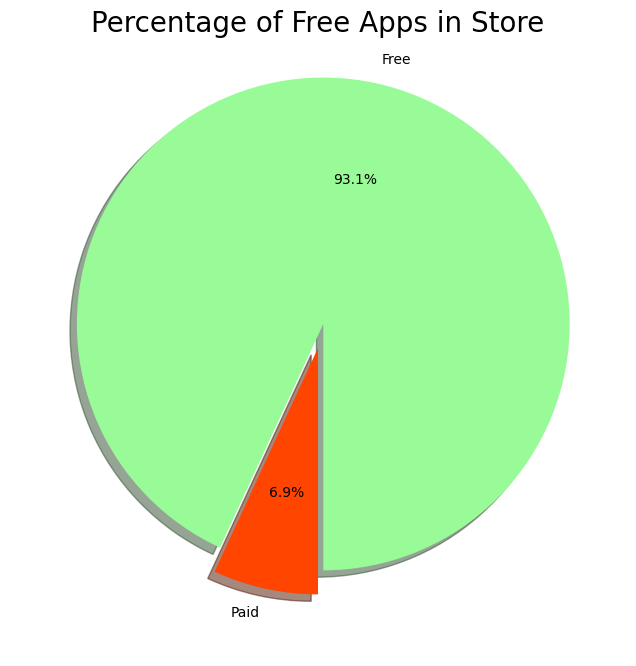

In [54]:
# Data for plotting
labels = df['Type'].value_counts(sort=True).index  # Categories of app types
sizes = df['Type'].value_counts(sort=True)         # Count of each app type

# Define colors for the pie chart and the explode effect
colors = ["palegreen", "orangered"]
explode = (0.1, 0)  # Highlight the first slice

# Set the figure size
rcParams['figure.figsize'] = 8, 8

# Create a pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270)

# Add a title to the plot
plt.title('Percentage of Free Apps in Store', size=20)

# Display the plot
plt.show()

Most applications in this store are free, accounting for 93.1% of the total

In [55]:
# Create a new column 'Free' where 'Free' apps are marked with 1 and other types with 0
df['Free'] = df['Type'].map(lambda s: 1 if s == 'Free' else 0)

# Remove the 'Type' column from the DataFrame
df.drop(['Type'], axis=1, inplace=True)

# 7. Price

In [56]:
df['Price'].head()

0    0
1    0
2    0
3    0
4    0
Name: Price, dtype: object

In [57]:
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

The data is in object format and includes dollar signs as part of the values.

In [58]:
df['Price'].value_counts().head(30)

Price
0          8715
$2.99       114
$0.99       106
$4.99        70
$1.99        59
$3.99        58
$1.49        30
$2.49        21
$5.99        18
$9.99        16
$6.99        13
$399.99      11
$14.99       10
$4.49         9
$3.49         7
$7.99         7
$29.99        6
$24.99        5
$11.99        5
$12.99        5
$19.99        5
$8.99         4
$5.49         3
$16.99        3
$10.00        3
$3.95         2
$1.00         2
$1.70         2
$17.99        2
$33.99        2
Name: count, dtype: int64

In [59]:
# Remove dollar signs from the 'Price' column and convert the values to float
df['Price'] = df['Price'].apply(lambda x: x.replace('$', ''))  # Remove dollar signs
df['Price'] = df['Price'].apply(lambda x: float(x))  # Convert to float

In [60]:
df['Price'].describe()

count    9360.000000
mean        0.961279
std        15.821640
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

The average price of the apps is approximately USD 0.96. However, most of them are free, with 8,715 out of 9,360 apps listed at no cost. The most expensive app is priced at USD 400!

In [61]:
df[df['Price'] == 400]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Free
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,8,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,0


Text(0.5, 1.0, 'Scatter Plot of Rating vs Price')

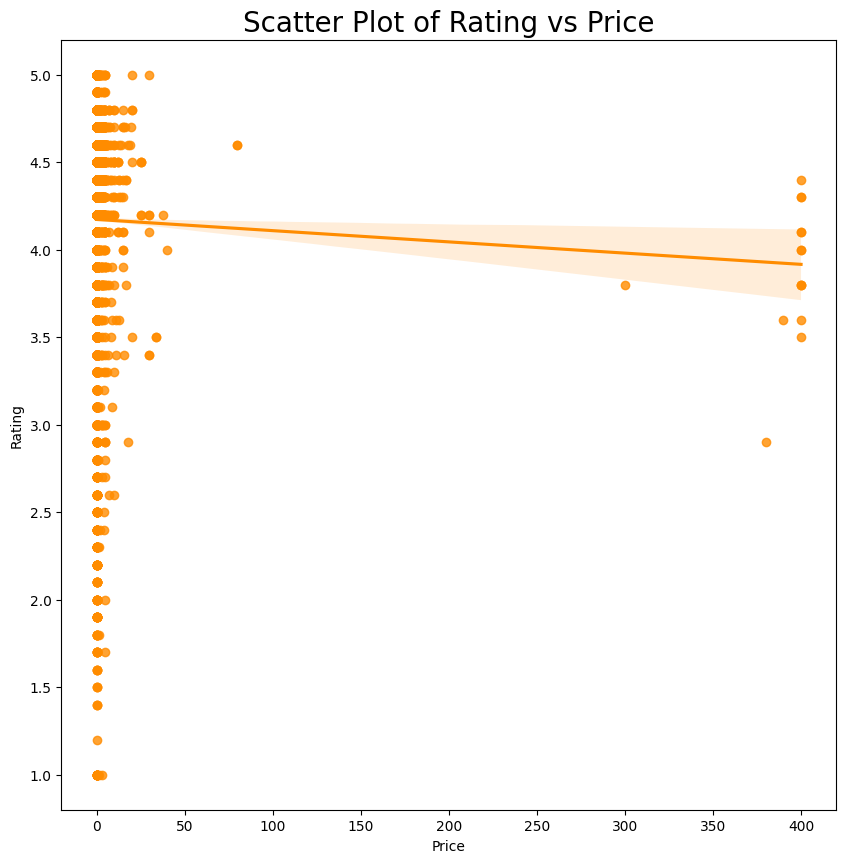

In [62]:
# Set the figure size for the plot
plt.figure(figsize=(10, 10))

# Create a regression plot to visualize the relationship between 'Price' and 'Rating'
sns.regplot(x="Price", y="Rating", color='darkorange', data=df[df['Reviews'] < 1000000])

# Add a title to the plot
plt.title('Scatter Plot of Rating vs Price', size=20)

Applications with higher prices may disappoint customers if they do not meet expectations.

In [63]:
# Assign price bands based on the 'Price' column
df.loc[df['Price'] == 0, 'PriceBand'] = '0 Free'
df.loc[(df['Price'] > 0) & (df['Price'] <= 0.99), 'PriceBand'] = '1 Cheap'
df.loc[(df['Price'] > 0.99) & (df['Price'] <= 2.99), 'PriceBand'] = '2 Not Cheap'
df.loc[(df['Price'] > 2.99) & (df['Price'] <= 4.99), 'PriceBand'] = '3 Normal'
df.loc[(df['Price'] > 4.99) & (df['Price'] <= 14.99), 'PriceBand'] = '4 Expensive'
df.loc[(df['Price'] > 14.99) & (df['Price'] <= 29.99), 'PriceBand'] = '5 Too Expensive'
df.loc[df['Price'] > 29.99, 'PriceBand'] = '6 Extremely Expensive'

In [64]:
# Calculate the average rating for each price band
df[['PriceBand', 'Rating']].groupby('PriceBand', as_index=False).mean()

,PriceBand,Rating
0,0 Free,4.186288
1,1 Cheap,4.300943
2,2 Not Cheap,4.292975
3,3 Normal,4.250318
4,4 Expensive,4.269149
5,5 Too Expensive,4.252000
6,6 Extremely Expensive,3.923810


Text(0.5, 1.0, 'Boxen Plot of Rating vs Price Band')

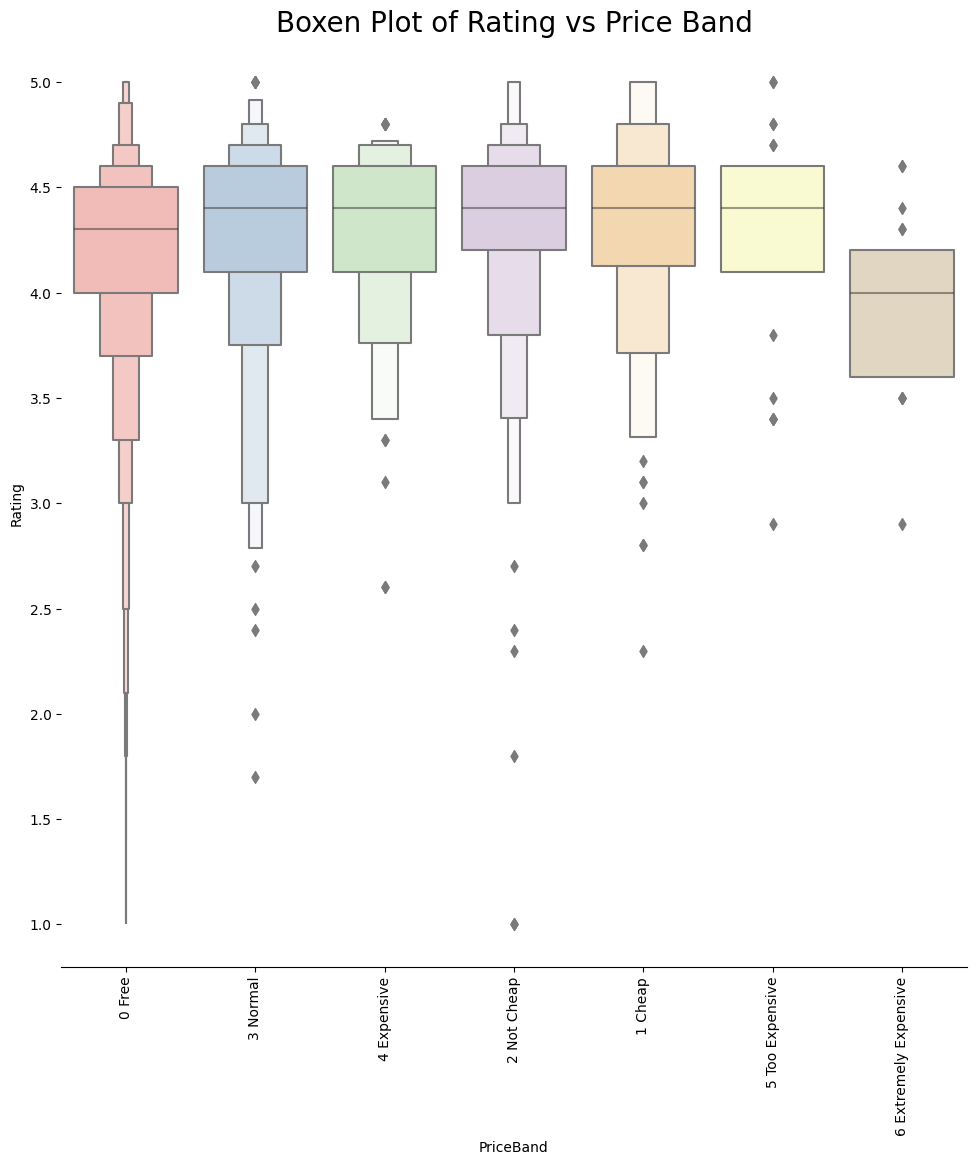

In [65]:
# Create a boxen plot to visualize the distribution of ratings across different price bands
g = sns.catplot(x="PriceBand", y="Rating", data=df, kind="boxen", height=10, palette="Pastel1")

# Remove the left spine for a cleaner look
g.despine(left=True)

# Rotate x-axis labels for better readability
g.set_xticklabels(rotation=90)

# Set the label for the y-axis
g = g.set_ylabels("Rating")

# Add a title to the plot
plt.title('Boxen Plot of Rating vs Price Band', size=20)

Price does not significantly affect ratings. However, very expensive apps might receive lower ratings.

In [68]:
def generate_color():
    # Generate a random RGB color in hexadecimal format
    color = '#{:02x}{:02x}{:02x}'.format(*[random.randint(0, 255) for _ in range(3)])
    return color

In [69]:
# Create a color palette for each category
flatui = []
# Loop through each unique category and generate a color
for i in range(len(df['Category'].unique())):
    flatui.append(generate_color())

# 8. Content Rating

In [71]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

Text(0.5, 1.0, 'Box Plot of Rating vs Content Rating')

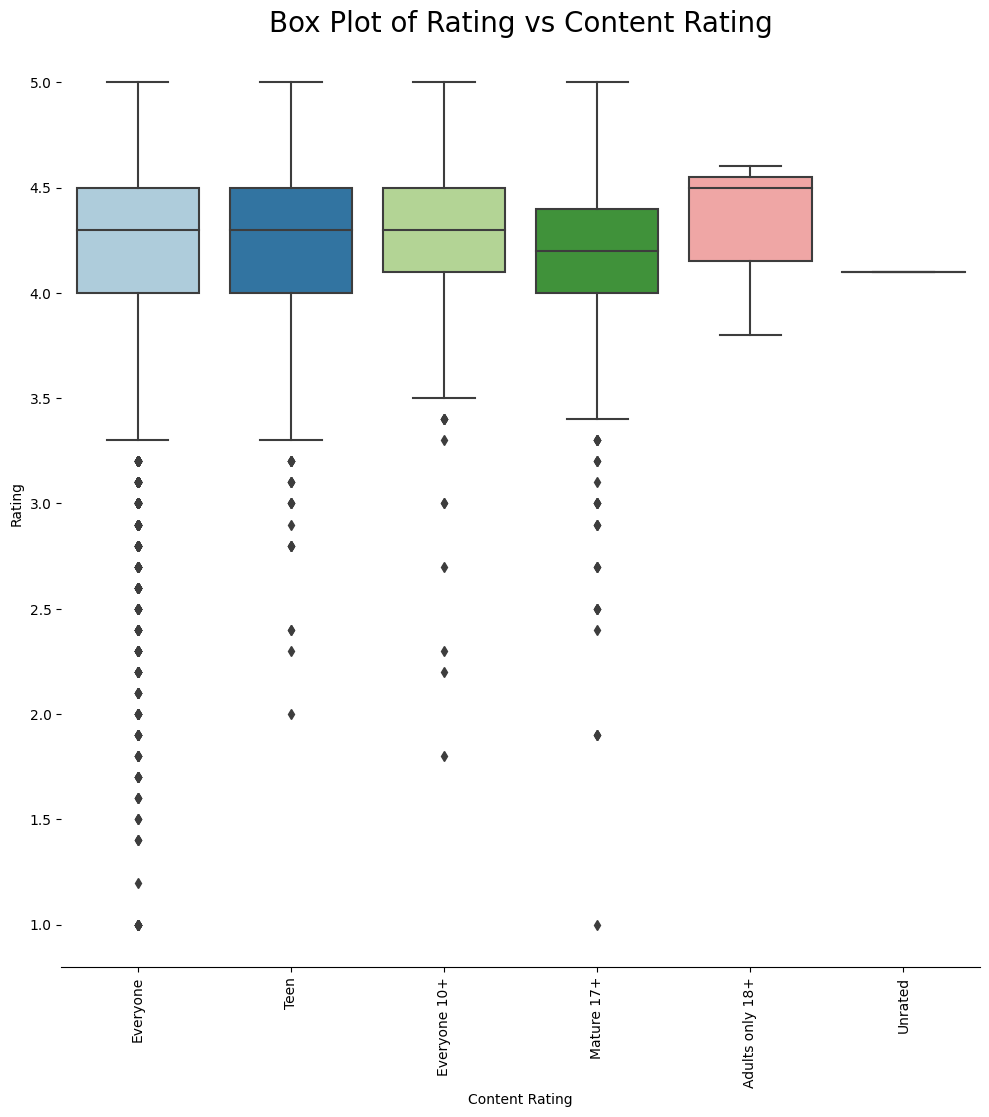

In [72]:
# Create a box plot to visualize the distribution of ratings across different content ratings
g = sns.catplot(
    x="Content Rating", 
    y="Rating", 
    data=df, 
    kind="box", 
    height=10, 
    palette="Paired"
)

# Remove the left spine for a cleaner look
g.despine(left=True)

# Rotate x-axis labels for better readability
g.set_xticklabels(rotation=90)

# Set the label for the y-axis
g = g.set_ylabels("Rating")

# Add a title to the plot
plt.title('Box Plot of Rating vs Content Rating', size=20)

Content rating does not significantly affect the rating of applications. However, it appears that mature applications tend to receive lower ratings compared to others.

In [73]:
# Display records where the content rating is 'Unrated'
df[df['Content Rating'] == 'Unrated']

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Free,PriceBand
8266,DC Universe Online Map,TOOLS,4.1,1186,6400000.0,9,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up,1,0 Free


Dropping the 'Unrated' content rating as it contains only one record.

In [74]:
# Filter out records where the content rating is 'Unrated'
df = df[df['Content Rating'] != 'Unrated']

In [75]:
# Convert 'Content Rating' column into one-hot encoded columns
df = pd.get_dummies(df, columns=["Content Rating"])

# 9. Genres

In [76]:
# Print the number of unique genres
print(len(df['Genres'].unique()), "genres")

# Print the list of unique genres
print("\n", df['Genres'].unique())

115 genres

 ['Art & Design' 'Art & Design;Pretend Play' 'Art & Design;Creativity'
 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business' 'Comics'
 'Comics;Creativity' 'Communication' 'Dating' 'Education;Education'
 'Education' 'Education;Creativity' 'Education;Music & Video'
 'Education;Action & Adventure' 'Education;Pretend Play'
 'Education;Brain Games' 'Entertainment' 'Entertainment;Music & Video'
 'Entertainment;Brain Games' 'Entertainment;Creativity' 'Events' 'Finance'
 'Food & Drink' 'Health & Fitness' 'House & Home' 'Libraries & Demo'
 'Lifestyle' 'Lifestyle;Pretend Play' 'Adventure;Action & Adventure'
 'Arcade' 'Casual' 'Card' 'Casual;Pretend Play' 'Action' 'Strategy'
 'Puzzle' 'Sports' 'Music' 'Word' 'Racing' 'Casual;Creativity'
 'Casual;Action & Adventure' 'Simulation' 'Adventure' 'Board' 'Trivia'
 'Role Playing' 'Simulation;Education' 'Action;Action & Adventure'
 'Casual;Brain Games' 'Simulation;Action & Adventure'
 'Educational;Creativity' 'Puzzle;Brain Games' 'Educati

In [77]:
df.Genres.value_counts().head(10)

Genres
Tools            731
Entertainment    533
Education        468
Action           358
Productivity     351
Medical          350
Sports           333
Communication    328
Finance          323
Photography      317
Name: count, dtype: int64

In [78]:
df.Genres.value_counts().tail(10)

Genres
Health & Fitness;Action & Adventure    1
Health & Fitness;Education             1
Travel & Local;Action & Adventure      1
Board;Pretend Play                     1
Lifestyle;Pretend Play                 1
Parenting;Brain Games                  1
Card;Brain Games                       1
Tools;Education                        1
Entertainment;Education                1
Strategy;Creativity                    1
Name: count, dtype: int64

Many genres contain only a few records, which may introduce bias. Therefore, grouping them into broader categories by ignoring sub-genres (i.e., text after the " ; " sign).

In [79]:
df['Genres'] = data['Genres'].str.split(';').str[0]

In [80]:
# Print the number of unique genres
print(len(df['Genres'].unique()), "genres")

# Print the list of unique genres
print("\n", df['Genres'].unique())

48 genres

 ['Art & Design' 'Auto & Vehicles' 'Beauty' 'Books & Reference' 'Business'
 'Comics' 'Communication' 'Dating' 'Education' 'Entertainment' 'Events'
 'Finance' 'Food & Drink' 'Health & Fitness' 'House & Home'
 'Libraries & Demo' 'Lifestyle' 'Adventure' 'Arcade' 'Casual' 'Card'
 'Action' 'Strategy' 'Puzzle' 'Sports' 'Music' 'Word' 'Racing'
 'Simulation' 'Board' 'Trivia' 'Role Playing' 'Educational'
 'Music & Audio' 'Video Players & Editors' 'Medical' 'Social' 'Shopping'
 'Photography' 'Travel & Local' 'Tools' 'Personalization' 'Productivity'
 'Parenting' 'Weather' 'News & Magazines' 'Maps & Navigation' 'Casino']


In [81]:
df.Genres.value_counts().tail(10)

Genres
Comics           58
Parenting        50
Card             48
Events           45
Beauty           42
Casino           37
Trivia           28
Word             28
Music            24
Music & Audio     1
Name: count, dtype: int64

Grouping Music & Audio as Music

In [82]:
df['Genres'].replace('Music & Audio', 'Music',inplace = True)

In [83]:
df[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean().describe()

,Rating
count,47.000000
mean,4.210662
std,0.104405
min,3.970769
25%,4.132039
50%,4.198246
75%,4.282529
max,4.435556


In [84]:
df[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean().sort_values('Rating').head(1)

,Genres,Rating
14,Dating,3.970769


In [85]:
df[['Genres', 'Rating']].groupby(['Genres'], as_index=False).mean().sort_values('Rating').tail(1)

,Genres,Rating
18,Events,4.435556


Observing the standard deviation, it appears that the genre does not significantly affect the rating. The genre with the lowest average rating is "Dating," with a rating of 3.97, while the genre with the highest average rating is "Events," with a rating of 4.43.

Text(0.5, 1.0, 'Boxen Plot of Rating by Genre')

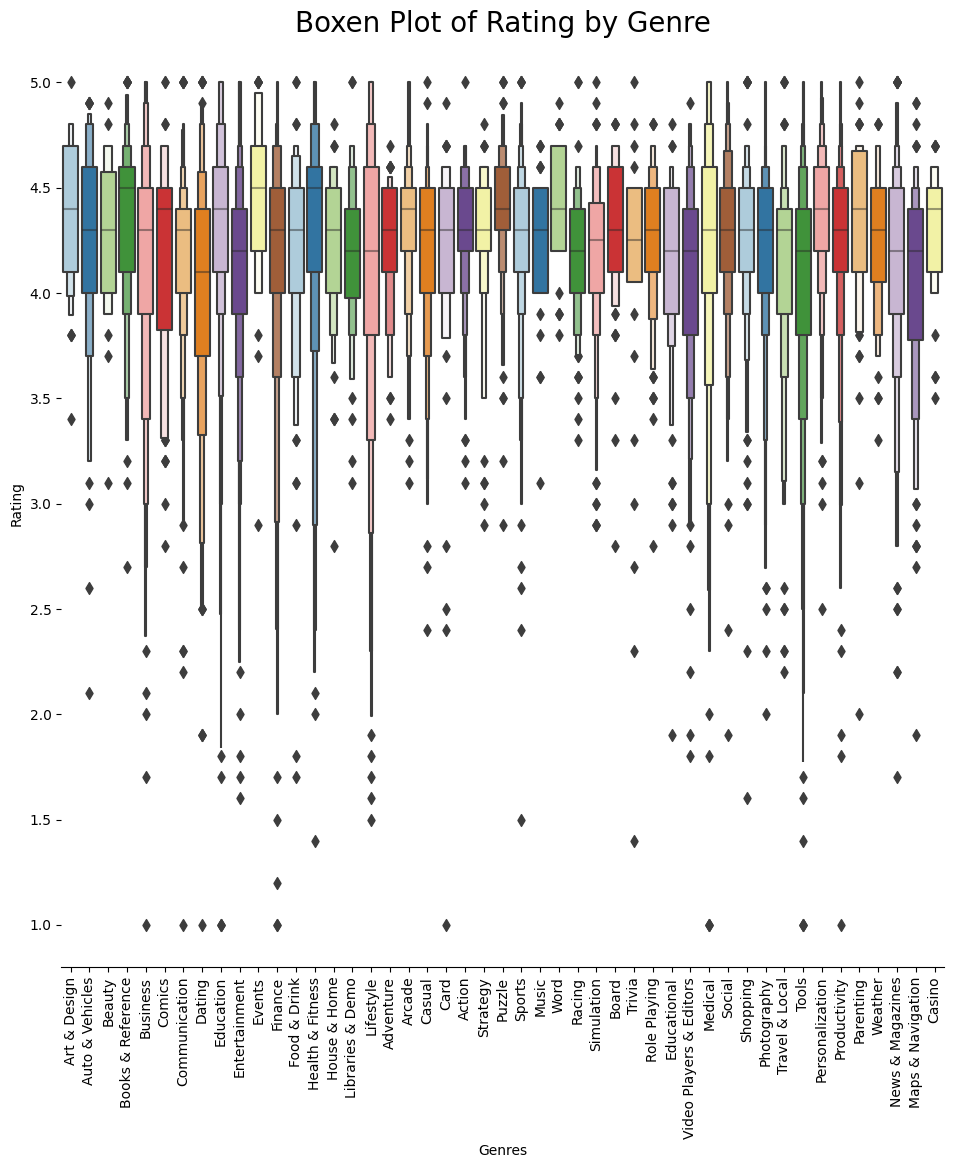

In [87]:
# Create a boxen plot to visualize the distribution of ratings across different genres
g = sns.catplot(
    x="Genres", 
    y="Rating", 
    data=df, 
    kind="boxen", 
    height=10, 
    palette="Paired"
)

# Remove the left spine for a cleaner look
g.despine(left=True)

# Rotate x-axis labels for better readability
g.set_xticklabels(rotation=90)

# Set the label for the y-axis
g = g.set_ylabels("Rating")

# Add a title to the plot
plt.title('Boxen Plot of Rating by Genre', size=20)

# 10. Last Updated

In [88]:
df['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

The "Last Updated" feature is currently in string format. We need to convert it into a suitable format for plotting or modeling.

Converting the "Last Updated" feature to the "datetime" format. However, it still cannot be used directly. Therefore, creating a new feature called "lastupdate." This feature will indicate how many days ago the app was last updated. Assuming that the latest update in this dataset is from August 8, 2018, which will be considered as today's date.

In [89]:
# Convert the 'Last Updated' column to datetime format and store it in a new column 'new'
df['new'] = pd.to_datetime(df['Last Updated'])

# Display summary statistics of the new datetime column
df['new'].describe()

count                             9359
mean     2017-11-29 18:24:25.541190400
min                2010-05-21 00:00:00
25%                2017-10-09 00:00:00
50%                2018-06-01 00:00:00
75%                2018-07-24 00:00:00
max                2018-08-08 00:00:00
Name: new, dtype: object

In [90]:
# Display the most recent date in the 'new' column
df['new'].max()

Timestamp('2018-08-08 00:00:00')

In [91]:
# Example of calculating the difference between two dates in the 'new' column
df['new'][0] - df['new'].max()

Timedelta('-213 days +00:00:00')

In [92]:
# Calculate the number of days since the last update and store it in the 'lastupdate' column
df['lastupdate'] = (df['new'] - df['new'].max()).dt.days

# Display the first few values of the 'lastupdate' column
df['lastupdate'].head()

0   -213
1   -205
2     -7
3    -61
4    -49
Name: lastupdate, dtype: int64

Text(0.5, 1.0, 'Rating vs. Days Since Last Update')

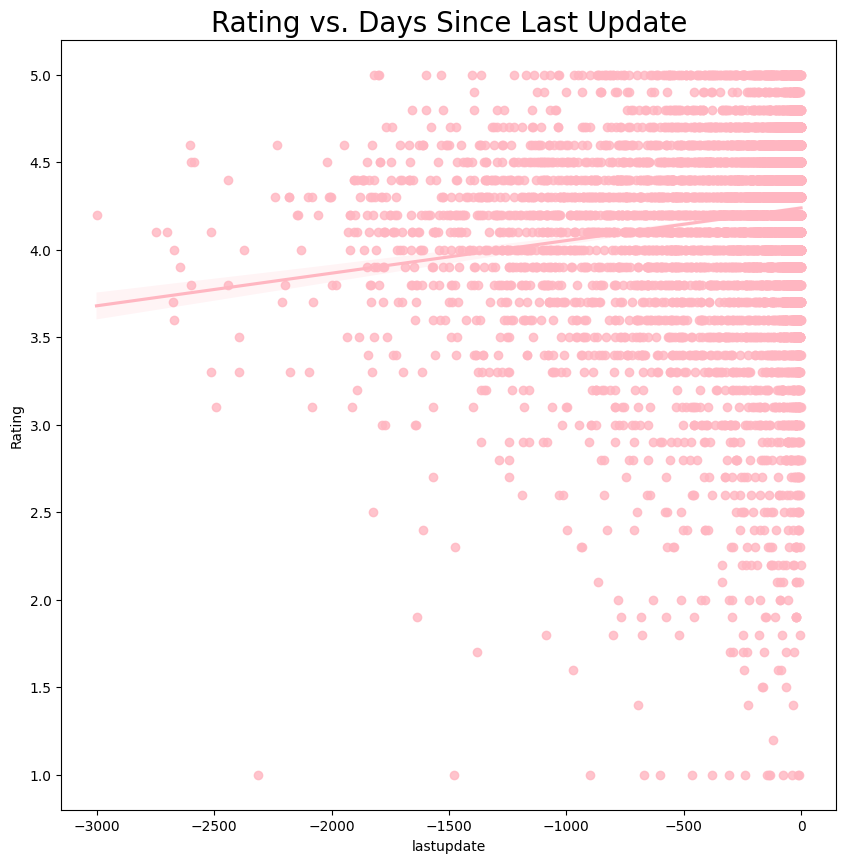

In [93]:
# Create a scatter plot with a regression line to visualize the relationship between 'lastupdate' and 'Rating'
plt.figure(figsize=(10, 10))
sns.regplot(x="lastupdate", y="Rating", color='lightpink', data=df)

# Add a title to the plot
plt.title('Rating vs. Days Since Last Update', size=20)

In [94]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,Free,PriceBand,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,new,lastupdate
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,8,0.0,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1,0 Free,False,True,False,False,False,2018-01-07,-213
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,11,0.0,Art & Design,"January 15, 2018",2.0.0,4.0.3 and up,1,0 Free,False,True,False,False,False,2018-01-15,-205
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,13,0.0,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1,0 Free,False,True,False,False,False,2018-08-01,-7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,15,0.0,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1,0 Free,False,False,False,False,True,2018-06-08,-61
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,10,0.0,Art & Design,"June 20, 2018",1.1,4.4 and up,1,0 Free,False,True,False,False,False,2018-06-20,-49
